# Recommender system by Alternating Least Squares for Implicit Feedback

In [3]:
import pandas as pd
data = pd.read_csv('data.csv')
data.head()

,user_id,item_id,dow,hod,category_id,cusine_id,restaurant_id,item_count
0,-6088859261566846925,601d4dc5-2ad,7,3,9c64431e-79f,fb8b5b7f-013,706247b3-86e,1
1,-4662982070704311223,af48a23f-f80,7,2,a989cb37-db5,8631ea96-a78,ea90883c-a2f,1
2,-4849981472186386714,bab8cfae-930,1,1,4f31b9ea-059,5aa1a680-942,d9ab8a13-380,1
3,-5400975689533971605,3ae9d553-282,4,0,37d510f8-745,c9aa3993-86f,0b8d021a-c5c,1
4,4810905585891548302,3d673534-8f8,3,1,4264559d-470,5aa1a680-942,5772716f-1f3,1


In [4]:
print('Number of rows and columns:',data.shape)

Number of rows and columns: (323138, 8)


## Exploratory Data Analysis

In [5]:
print('Number of user:', len(data.user_id.unique()))
print('Number of item:', len(data.item_id.unique()))
print('Number of category:', len(data.category_id.unique()))
print('Number of cusine:', len(data.cusine_id.unique()))
print('Number of restaurant:', len(data.restaurant_id.unique()))

Number of user: 68109
Number of item: 53403
Number of category: 15131
Number of cusine: 47
Number of restaurant: 3357


#### Different item_id consists of different combination of category, cusine and restaurant so finally we will work with item_id as it consists all the information of category, cusine and restaurant.

In [6]:
print('Number of orders on different days')
data.dow.value_counts()

Number of orders on different days


6    49954
5    49468
7    46886
4    46580
3    45232
1    43293
2    41725
Name: dow, dtype: int64

In [7]:
print('Number of items sold on different days:')
x_d =pd.pivot_table(data, values = 'item_count', index = 'dow', aggfunc = sum)
x_d.sort_values('item_count', ascending = False)

Number of items sold on different days:


,item_count
dow,
6,50848
5,50373
7,47592
4,47313
3,46080
1,43999
2,42493


In [8]:
print('Number of orders on different hours of the day:')
data.hod.value_counts()

Number of orders on different hours of the day:


2     35400
3     34646
1     34144
4     30011
0     28778
21    24197
20    23857
23    19484
22    19042
19    17584
5     14956
16    10558
17    10257
15     8879
18     8393
6      2952
Name: hod, dtype: int64

In [9]:
print('Number of items sold in different hours of the day:')
x = pd.pivot_table(data, values = 'item_count', index = 'hod', aggfunc = sum)
x.sort_values('item_count', ascending = False)

Number of items sold in different hours of the day:


,item_count
hod,
2,35917
3,35165
1,34728
4,30476
0,29243
21,24566
20,24318
23,19733
22,19283


#### Number of orders and number of items sold have no significant changes for different days and hours, I mean day 6 or hour 2 has the highest orders and the highest item sold and also true for lowest. I wanted to check if any lower nubmer of order has higher of sell or not.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
data.dow = data.dow.astype('str')
order = data.dow.value_counts().index
color = sns.color_palette()[9]
n_dow = data.dow.shape[0]
dow_counts = data.dow.value_counts()
fig = plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.countplot(data = data, y = 'dow', order = order, color = color)
for i in range(dow_counts.shape[0]):
    count = dow_counts[i]
    string = '{:0.1f}%'.format(100*count/n_dow)
    plt.text(count+1, i, string)
    plt.xlabel('Proportion')
    plt.title('Order (%) on different days of week')
    
data.hod = data.hod.astype('str')
order_hod = data.hod.value_counts().index
n_hod = data.hod.shape[0]
hod_counts = data.hod.value_counts()
plt.subplot(1,2,2)
sns.countplot(data = data, y = 'hod', order = order_hod, color = color)
for i in range(hod_counts.shape[0]):
    count_h = hod_counts[i]
    string_h = '{:.1f}%'.format(100*count_h/n_hod)
    plt.text(count_h+i, i, string_h)
    plt.xlabel('Proportion')
    plt.title('Order (%) on different hours of the day')

#### Though there are no significant differences among different days of the week, day 6 and 5 have more than 15% orders may be 5 and 6 are friday and saturday respectively. 
#### For hour we can see there is no data for hour 7 to hour 14, may be this period is 12 AM (Night) to 8 AM (Morning). Other than this period we can see 0 to 4 (may be 5 PM to 9 PM) are the pick hours for the orders, within these hours maximum orders have been placed. 


In [11]:
a = data['dow'].astype('str')
b = data['hod'].astype('str')
H_D = a + b
data.insert(4, 'H_D', H_D)
data.head()

,user_id,item_id,dow,hod,H_D,category_id,cusine_id,restaurant_id,item_count
0,-6088859261566846925,601d4dc5-2ad,7,3,73,9c64431e-79f,fb8b5b7f-013,706247b3-86e,1
1,-4662982070704311223,af48a23f-f80,7,2,72,a989cb37-db5,8631ea96-a78,ea90883c-a2f,1
2,-4849981472186386714,bab8cfae-930,1,1,11,4f31b9ea-059,5aa1a680-942,d9ab8a13-380,1
3,-5400975689533971605,3ae9d553-282,4,0,40,37d510f8-745,c9aa3993-86f,0b8d021a-c5c,1
4,4810905585891548302,3d673534-8f8,3,1,31,4264559d-470,5aa1a680-942,5772716f-1f3,1


In [12]:
pd.set_option('max_r', 15)
data.H_D.value_counts()

63    6119
62    5988
61    5577
72    5418
71    5412
64    5350
51    5044
      ... 
66     546
16     481
56     469
36     417
76     373
46     351
26     315
Name: H_D, Length: 112, dtype: int64

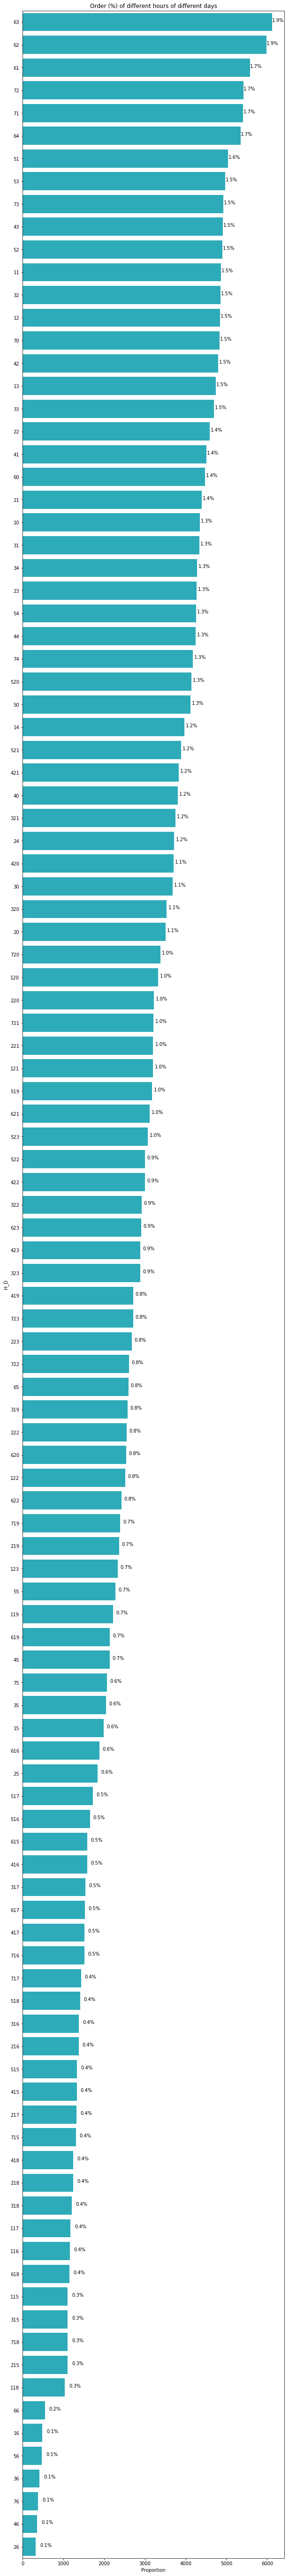

In [13]:
order_H = data.H_D.value_counts().index
n_H = data.H_D.shape[0]
H_counts = data.H_D.value_counts()
fig = plt.figure(figsize = (10,100))
sns.countplot(data = data, y = 'H_D', order = order_H, color = color)
for i in range(H_counts.shape[0]):
    count_H = H_counts[i]
    string_H = '{:.1f}%'.format(100*count_H/n_H)
    plt.text(count_H+i, i, string_H)
    plt.xlabel('Proportion')
    plt.title('Order (%) of different hours of different days')

#### Different hours of different days can be a good indicator for our model, I will stop here and try to incorporate this with the model later.

## Data preprocessing

In [14]:
print('Number of missing values:')
data.isnull().sum()

Number of missing values:


user_id          0
item_id          0
dow              0
hod              0
H_D              0
category_id      7
cusine_id        3
restaurant_id    0
item_count       0
dtype: int64

#### As we are not using category_id and cusine_id we will not impute those missing values.

In [15]:
print('item_id dtype:',data.item_id.dtype)

item_id dtype: object


#### For my model I need user id and item id as numeric data type instead of category. So I will convert those into numeric.

In [16]:
data['userId'] = data['user_id'].astype('category').cat.codes
data['itemId'] = data['item_id'].astype('category').cat.codes

In [17]:
data.head()

,user_id,item_id,dow,hod,H_D,category_id,cusine_id,restaurant_id,item_count,userId,itemId
0,-6088859261566846925,601d4dc5-2ad,7,3,73,9c64431e-79f,fb8b5b7f-013,706247b3-86e,1,11800,20043
1,-4662982070704311223,af48a23f-f80,7,2,72,a989cb37-db5,8631ea96-a78,ea90883c-a2f,1,17106,36473
2,-4849981472186386714,bab8cfae-930,1,1,11,4f31b9ea-059,5aa1a680-942,d9ab8a13-380,1,16397,38909
3,-5400975689533971605,3ae9d553-282,4,0,40,37d510f8-745,c9aa3993-86f,0b8d021a-c5c,1,14412,12338
4,4810905585891548302,3d673534-8f8,3,1,31,4264559d-470,5aa1a680-942,5772716f-1f3,1,52030,12849


#### I will retain old user_id and item_id so that I can generate recommended list based on old IDs.

In [18]:
from sklearn.model_selection import train_test_split
train, cros_val = train_test_split(data, test_size = 0.2, random_state = 1)

In [19]:
train, test = train_test_split(train, test_size = 0.25, random_state = 1)

In [20]:
print('Splitted dataset into train set, cross validation set and test set')
print('Train shape:', train.shape)
print('Test shape:', test.shape)
print('cros_val shape:',cros_val.shape)

Splitted dataset into train set, cross validation set and test set
Train shape: (193882, 11)
Test shape: (64628, 11)
cros_val shape: (64628, 11)


#### Splitted the dataset into 60,24,16.

# Recommender system
#### I don't have explicit ratings in my dataset, so I need to use implicit feedback from customers. Here item_count considered as implicit feedback from customers, item_counts represents customers's preference or confidence for a specific item. 

#### I will use implicit Alternating Least Squares (ALS) as a recommendation model. To go forward we need two csr matrix, user_items (csr_matrix) – Sparse matrix containing the liked items for the user and item_users (csr_matrix) – Matrix of confidences for the liked items. This matrix should be a csr_matrix where the rows of the matrix are the item, the columns are the users that liked that item, and the value is the confidence that the user liked the item.

In [21]:
import scipy.sparse as sparse
user_items = sparse.csr_matrix((train['item_count'].astype(float),(train['userId'], train['itemId'])))
item_users = sparse.csr_matrix((train['item_count'].astype(float),(train['itemId'], train['userId'])))

In [22]:
print(item_users)

  (0, 10245)	1.0
  (0, 27974)	1.0
  (0, 30094)	1.0
  (0, 62148)	1.0
  (1, 30300)	1.0
  (2, 10508)	1.0
  (2, 24852)	1.0
  (2, 42938)	1.0
  (2, 49491)	1.0
  (3, 18148)	1.0
  (3, 27487)	1.0
  (3, 44722)	1.0
  (3, 67581)	1.0
  (4, 8042)	1.0
  (4, 19024)	1.0
  (4, 19897)	1.0
  (4, 24292)	1.0
  (4, 35717)	1.0
  (4, 35747)	1.0
  (4, 38992)	5.0
  (4, 40428)	4.0
  (4, 66014)	1.0
  (5, 53978)	1.0
  (6, 2162)	2.0
  (6, 5753)	1.0
  :	:
  (53397, 34710)	1.0
  (53397, 39157)	1.0
  (53397, 46744)	1.0
  (53397, 50097)	1.0
  (53397, 56267)	1.0
  (53397, 66850)	1.0
  (53399, 59001)	1.0
  (53401, 2603)	1.0
  (53401, 9811)	1.0
  (53401, 12394)	1.0
  (53401, 13644)	1.0
  (53401, 14191)	1.0
  (53401, 23215)	1.0
  (53401, 26125)	1.0
  (53401, 27942)	1.0
  (53401, 34807)	1.0
  (53401, 34849)	1.0
  (53401, 44764)	1.0
  (53401, 47134)	1.0
  (53401, 47813)	1.0
  (53401, 49219)	1.0
  (53401, 49468)	1.0
  (53401, 54297)	1.0
  (53402, 22079)	1.0
  (53402, 25703)	1.0


#### User 40428 bought item 4 6 times already, so s/he pretty confident about the item 4 or possesses higher preference for item 4.

In [23]:
import os
os.environ['MKL_NUM_THREADS'] = '1' #To avoid multithreading.
import implicit
model = implicit.als.AlternatingLeastSquares(factors = 500, iterations = 10)
''''Parameters: (factors=100, regularization=0.01, dtype=<type 'numpy.float32'>, use_native=True, use_cg=True, 
use_gpu=False, iterations=15, calculate_training_loss=False, num_threads=0)''';

In [24]:
alpha = 40
train_conf = (item_users*alpha).astype('double')

In [25]:
model.fit(train_conf)

100%|████████████████████████████████████████████████████████████████████████████████| 10.0/10 [00:53<00:00,  5.62s/it]


## Model evaluation 
#### Comparision of train, cros_val and test scores. I used map@k as evaluation matric. map@k considers the order of the predicted items so recommendation accuracy can be obtained easily. 

In [28]:
import csv
fields = 'userId', 'item_list'
filename = 'rec_train.csv'
with open (filename, 'a', newline = '') as f:
    writer = csv.writer(f)
    writer.writerow(fields)
    userId = train['userId'].values.tolist()
    for user in userId:
        scores = []
        items =[]
        results = []
        results.append(user)
        recommendations = model.recommend(user, user_items, N = 5)
        for item in recommendations:
            ids, score = item
            scores.append(score)
            items.append(ids)
        results.append(items)
        writer.writerow(results)

In [40]:
predicted = pd.read_csv('rec_train.csv')
predicted = predicted['item_list']
import ast
predicted = [ast.literal_eval(a) for a in predicted]
actual = train['itemId']
import numpy as np
actual = np.array(actual).reshape(193882,1)
import ml_metrics
score = ml_metrics.mapk(actual, predicted, 5)
print('Train score:','{:.8f}'.format(score))

Train score: 0.00001032


In [33]:
import csv
fields = 'user_id', 'item_list'
filename = 'rec_cros.csv'
with open(filename, 'a', newline = '') as f:
    writer = csv.writer(f)
    writer.writerow(fields)
    userId = cros_val['userId'].values.tolist()
    for user in userId:
        scores = []
        items = []
        results = []
        results.append(user)
        recommendations = model.recommend(user, user_items, N = 5)
        for item in recommendations:
            ids, score = item
            scores.append(score)
            items.append(ids)
        results.append(items)
        writer.writerow(results)

In [34]:
predicted_c = pd.read_csv('rec_cros.csv')
predicted_c = predicted_c['item_list']
import ast 
predicted_c = [ast.literal_eval(a) for a in predicted_c]
actual_c = cros_val['itemId']
import numpy as np
actual_c = np.array(actual_c).reshape(64628,1)
import ml_metrics
ml_metrics.mapk(actual_c, predicted_c, 5)

0.09036382579274205

In [35]:
fields = 'user_id', 'item_list'
filename = 'rec_test.csv'
with open(filename, 'a', newline = '') as f:
    writer = csv.writer(f)
    writer.writerow(fields)
    userId = test['userId'].values.tolist()
    for user in userId:
        scores = []
        items = []
        results = []
        results.append(user)
        recommendations = model.recommend(user, user_items, N = 5)
        for item in recommendations:
            ids, score = item
            scores.append(score)
            items.append(ids)
        results.append(items)
        writer.writerow(results)

In [36]:
predicted_t = pd.read_csv('rec_test.csv')
predicted_t = predicted_t['item_list']
predicted_t = [ast.literal_eval(a) for a in predicted_t]
actual_t = test['itemId']
actual_t = np.array(actual_t).reshape(64628,1)
ml_metrics.mapk(actual_t, predicted_t, 5)

0.08932815497926595

#### Fortunately or unfortunately I have lower score in training set. cros_val score and test score are good and consistant. 

In [37]:
model.explain(40428, user_items, 4, N = 5)

(0.20466373816175615,
 [(4, 0.09727717820047085),
  (18416, 0.06715927199438217),
  (18193, 0.010457817211991575),
  (5664, 0.010180590616848928),
  (3298, 0.010089883184075783)],
 (array([[ 1.19450002,  0.82935004,  0.88143454, ...,  0.85185347,
           0.83102421,  0.8709549 ],
         [ 0.99065863,  0.86039364,  0.37685385, ...,  0.3688003 ,
           0.35884205,  0.37072321],
         [ 1.05287357,  1.05526042,  0.79501633, ...,  0.22679665,
           0.22518549,  0.23623052],
         ...,
         [ 1.01753898,  1.02379813,  1.07014392, ...,  0.62721739,
           0.01202705, -0.00475507],
         [ 0.99265843,  0.99795537,  1.04675059, ...,  1.01445251,
           0.61544535,  0.00427259],
         [ 1.04035564,  1.04129437,  1.09520532, ...,  1.0567832 ,
           1.03388735,  0.62561483]]), False))

#### We can check the total predicted score for a specific user/item pair, e.g., 40428/4 pair total score is 0.2. Also top 5 (items) contributions for this pair is return by model.explain. So the model can explain the reason behind the recommendation.

In [42]:
print('List of similar items for itemId 4:')
model.similar_items(4, N = 5)

List of similar items for itemId 4:


[(4, 0.15983614),
 (17294, 0.1536483),
 (18416, 0.15207423),
 (33646, 0.14479801),
 (7619, 0.13979481)]

In [43]:
print('List of similar users for userId 40428:')
model.similar_users(40428, N = 5)

List of similar users for userId 40428:


[(40428, 11.223861),
 (38992, 9.157663),
 (39821, 8.955027),
 (23007, 8.955026),
 (19024, 8.842846)]